In [ ]:
import numpy as np
data = np.loadtxt('data.txt', delimiter=',')
print(data.shape)

In [2]:
import gym
import cv2
import csv

env = gym.make('MountainCar-v0')
env.reset()
img = env.render(mode='rgb_array')
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
image = cv2.resize(img, (150,100))

action = 0
reward  =1
done = True

cv2.imwrite('test_img.jpg', img)
cv2.imwrite('test_img2.jpg', image)
with open('test/numerical_values.csv', mode='a+',newline='') as numerical_data:
    numerical_data_writer = csv.writer(numerical_data, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
    numerical_data_writer.writerow([action, reward, done])

FileNotFoundError: [Errno 2] No such file or directory: 'test/numerical_values.csv'

In [ ]:
%matplotlib
import matplotlib.pyplot as plt
import gym
import myutils.trainingClasses.MountainCarTrain as agent


env = gym.make('MountainCar-v0')

dqn= agent.MountainCarTrain(env=env)
dqn.start()
rewards = dqn.analytics.rewards
episodes = dqn.analytics.episodes

plt.plot(episodes,rewards, marker='o', color='b')
plt.show()

In [ ]:
import zipfile
zip = zipfile.ZipFile('deploy_5_26_v2.zip')
zip.extractall()

In [ ]:
import gym
from myutils.gym_custom.gym_custom import MountainCarEnvWrapper


env = MountainCarEnvWrapper(gym.make('MountainCar-v0'))

env.reset()

env.set_state_with_harcoded_values(0.4,0.02)

In [21]:
import pickle
import numpy as np
with open('../../models/modelsMountainCar/offlineLearning/rewards_20000(1).dump', 'rb') as input_file:
    a = pickle.load(input_file)


for ep in range(len(a)):
    if a[i][1] != -300:
        print(a[i])

[161, -295.0]
[353, -252.0]
[440, -276.0]
[536, -285.0]
[619, -298.0]
[907, -222.0]
[917, -234.0]
[945, -257.0]
[1117, -226.0]
[1204, -281.0]
[1367, -236.0]
[1369, -292.0]
[1383, -260.0]
[1424, -233.0]
[1433, -259.0]
[1439, -269.0]
[1460, -173.0]
[1496, -261.0]
[1519, -270.0]
[1521, -268.0]
[1523, -298.0]
[1563, -247.0]
[1570, -264.0]
[1577, -271.0]
[1609, -292.0]
[1619, -258.0]
[1630, -272.0]
[1634, -227.0]
[1643, -270.0]
[1658, -258.0]
[1659, -255.0]
[1666, -243.0]
[1679, -281.0]
[1690, -253.0]
[1713, -275.0]
[1718, -217.0]
[1721, -268.0]
[1722, -264.0]
[1745, -298.0]
[1750, -257.0]
[1752, -248.0]
[1794, -269.0]
[1809, -276.0]
[1818, -232.0]
[1820, -217.0]
[1838, -260.0]
[1842, -272.0]
[1844, -250.0]
[1851, -240.0]
[1870, -255.0]
[1894, -290.0]
[1895, -247.0]
[1919, -203.0]
[1920, -232.0]
[1929, -265.0]
[1941, -234.0]
[1955, -299.0]
[1964, -186.0]
[1967, -250.0]
[1979, -209.0]
[1985, -293.0]
[2013, -297.0]
[2020, -159.0]
[2024, -297.0]
[2040, -245.0]
[2049, -219.0]
[2063, -217.0]
[20

In [6]:
import numpy as np

terminal = np.array([True, True, False, False])

Q_value_outputs = np.array([-4,5,6,10])

Q_value_outputs[terminal]

array([-4,  5])

Done


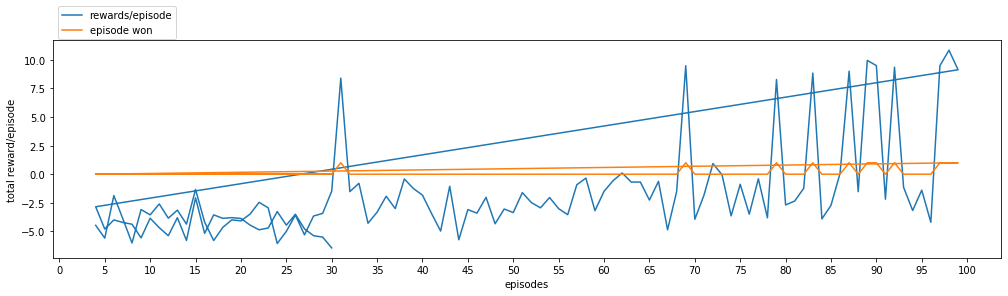

In [3]:
import numpy as np
import csv

a = []

with open('./rewards_in_episodes.csv', mode='r', newline='') as numerical_data:
    reader = csv.reader(numerical_data,delimiter=',')
    for row in reader:
        a.extend([np.asarray([float(row[0]),float(row[1]),float(row[2]) ] ) ] ),

a = np.asarray(a)
episodes = a[:,0]
rewards = a[:,1]
episodes_won = a[:,2]

import matplotlib.pyplot as plt
plt.figure(figsize=(17,4))
plt.plot(episodes,rewards, label="rewards/episode")
plt.plot(episodes,episodes_won,label="episode won")
plt.xlabel('episodes')
plt.ylabel('total reward/episode')
plt.legend(loc="upper left",bbox_to_anchor=(0,1.18))
plt.xticks(np.linspace(0,100,21))
plt.savefig("training_process_analysis_on_100_episodes.png")
print("Done")

Done


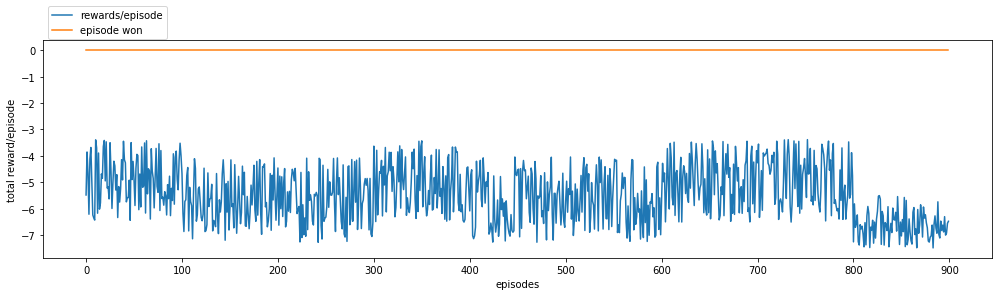

In [6]:
import numpy as np
import csv

a = []
number_of_validation_eps_for_model = 100
number_of_models = 9
with open('./test_during_training_analysis.csv', mode='r', newline='') as numerical_data:
    reader = csv.reader(numerical_data,delimiter=',')
    for row in reader:
        a.extend([np.asarray([float(row[0]),float(row[1]),float(row[2]) ] ) ] ),

a = np.asarray(a)
episodes = a[:,0]

#because for each new model the episodes start from 0, in order to include all validation data for all the models in 1 graph,
# I changed the validation episodes for each new model to start instead of  0 with 0+current_model*100(if the data is generated for 100 eps/model)
for i in range(number_of_models):
   a[i*number_of_validation_eps_for_model:(i+1)*number_of_validation_eps_for_model,0] = \
       a[i*number_of_validation_eps_for_model:(i+1)*number_of_validation_eps_for_model,0] + np.ones(number_of_validation_eps_for_model)*i*number_of_validation_eps_for_model

rewards = a[:,1]
episodes_won = a[:,2]

import matplotlib.pyplot as plt
plt.figure(figsize=(17,4))
plt.plot(episodes,rewards, label="rewards/episode")
plt.plot(episodes,episodes_won,label="episode won")
plt.xlabel('episodes')
plt.ylabel('total reward/episode')
plt.legend(loc="upper left",bbox_to_anchor=(0,1.18))

#used xticks to include all the validation data -> 900 eps in this case, and to index where the data for the new model starts -> 10 points for 9 intervals
plt.xticks(np.linspace(0,900,10))
plt.savefig("validation_100_ep_every_10.png")
print("Done")


In [ ]:

from collections import deque
import gym
from keras import models
from myutils.performanceAnalyzation.Analytics import Analytics
import datetime
from myutils.trainingClasses.MountainCarConvolutionalTraining import MountainCarConvolutionalTraining as conv_trainor
import numpy as np
import myutils.constants.Constants as cts
from myutils.gym_custom.gym_custom import MountainCarEnvWrapper
import csv

import os

env = MountainCarEnvWrapper(gym.make('MountainCar-v0').env)

time_steps_in_episode = 300
episodes = 100

models_from_training = os.listdir(cts.Constants.PATH_TO_MODELS_TRACKING_PROGRESS_TRESHOLD_SAVES)

number_of_models_saved = len(models_from_training)

for current_model_tested in range(number_of_models_saved):

    model=models.load_model(cts.Constants.PATH_TO_MODELS_TRACKING_PROGRESS_TRESHOLD_SAVES+models_from_training[current_model_tested])

    stack_depth = 4
    frame_skip = 4

    frames_memory = deque(maxlen=stack_depth)


    for ep in range(episodes):

        env.reset()

        reward_sum=0

        current_image =env.render(mode='rgb_array')
        current_frame =conv_trainor.process_image(conv_trainor ,current_image)  # the frame is an greyscale image of the current position
        current_frame = current_frame.reshape(1, current_frame.shape[0], current_frame.shape[1])
        current_state = np.repeat(current_frame,stack_depth, axis=0)
        frames_memory.extend(current_state)

        for t in range(time_steps_in_episode):

            if (t% frame_skip) == 0:
                current_state = current_state.reshape(1, current_state.shape[0], current_state.shape[1], current_state.shape[2])
                best_action = np.argmax(model.predict([current_state,np.ones((1,3))]))


            new_state_numerical, reward, done, _ = env.step_with_custom_reward(best_action)

            new_image = env.render(mode='rgb_array')
            next_frame = conv_trainor.process_image(conv_trainor,new_image)
            next_frame = next_frame.reshape(next_frame.shape[0], next_frame.shape[1])

            # current_state is a FIFO buffer so just by appending the size  of current_state is constant
            frames_memory.append(next_frame)

            new_state = np.asarray(frames_memory)

            # make the training possible only when the minimum experience was gathered

            reward_sum += reward
            current_state = new_state

            if done:
                break

        if t >= time_steps_in_episode - 1:
            print("Failed to finish task in episode {} with reward {} ".format(i, reward_sum))
        else:
            print("Success in epsoide {}, used {} time steps and obtain reward_sum : {}!".format(i, t,reward_sum))

        with open('./test_during_training_analysis.csv', mode='a+', newline='') as numerical_data:
            numerical_data_writer = csv.writer(numerical_data, delimiter=',', quotechar='"',
                                            quoting=csv.QUOTE_MINIMAL)
            numerical_data_writer.writerow([ep, reward_sum, 1 if done else 0])

Using TensorFlow backend.


In [ ]:
import os
from keras import models
import myutils.constants.Constants as cts

arr = os.listdir(cts.Constants.PATH_TO_MODELS_TRACKING_PROGRESS_TRESHOLD_SAVES)
#print(arr[0].split('_')[-1].split('.')[0])

lengths_models_saved = len(arr)

model=models.load_model(cts.Constants.PATH_TO_MODELS_TRACKING_PROGRESS_TRESHOLD_SAVES+arr[0])

#np.concatenate((np.linspace(0,100,11),np.linspace(0,100,11)))




Using TensorFlow backend.
